In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [56]:
# Load and preprocess data
df = pd.read_csv('TimeSeries.csv')

In [57]:
df

,Year,Month,Sales
0,2005,1,"10,827"
1,2005,2,"12,049"
2,2005,3,"18,298"
3,2005,4,"17,834"
4,2005,5,"16,480"
...,...,...,...
148,2017,5,"31,739"
149,2017,6,"30,315"
150,2017,7,"25,046"
151,2017,8,"23,285"


In [58]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

In [59]:
df.drop(['Year','Month'],axis=1,inplace=True)

In [60]:
df.set_index('Date', inplace=True)
# remove the space before column name
df.rename(columns = {' Sales':'Sales'}, inplace = True)
df['Sales'] = df['Sales'].str.replace(',', '').astype(int) # Remove commas and convert to int

In [61]:
df

,Sales
Date,
2005-01-01,10827
2005-02-01,12049
2005-03-01,18298
2005-04-01,17834
2005-05-01,16480
...,...
2017-05-01,31739
2017-06-01,30315
2017-07-01,25046


In [62]:
df.columns

Index(['Sales'], dtype='object')

In [63]:
df['Sales_LastMonth'] = df['Sales'].shift(+1)
df['Sales_2MonthBack'] = df['Sales'].shift(+2)
df['Sales_3MonthBack'] = df['Sales'].shift(+3)
df['Sales_4MonthBack'] = df['Sales'].shift(+4)
df['Sales_5MonthBack'] = df['Sales'].shift(+5)
df['Sales_6MonthBack'] = df['Sales'].shift(+6)
df['Sales_7MonthBack'] = df['Sales'].shift(+7)
df['Sales_8MonthBack'] = df['Sales'].shift(+8)
df['Sales_9MonthBack'] = df['Sales'].shift(+9)
df['Sales_10MonthBack'] = df['Sales'].shift(+10)
df['Sales_11MonthBack'] = df['Sales'].shift(+11)
df['Sales_12MonthBack'] = df['Sales'].shift(+12)

In [64]:
df.head(13)

,Sales,Sales_LastMonth,Sales_2MonthBack,Sales_3MonthBack,Sales_4MonthBack,Sales_5MonthBack,Sales_6MonthBack,Sales_7MonthBack,Sales_8MonthBack,Sales_9MonthBack,Sales_10MonthBack,Sales_11MonthBack,Sales_12MonthBack
Date,,,,,,,,,,,,,
2005-01-01,10827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-01,12049,10827.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-01,18298,12049.0,10827.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-01,17834,18298.0,12049.0,10827.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-01,16480,17834.0,18298.0,12049.0,10827.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-01,16690,16480.0,17834.0,18298.0,12049.0,10827.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-07-01,15389,16690.0,16480.0,17834.0,18298.0,12049.0,10827.0,NaN,NaN,NaN,NaN,NaN,NaN
2005-08-01,13031,15389.0,16690.0,16480.0,17834.0,18298.0,12049.0,10827.0,NaN,NaN,NaN,NaN,NaN
2005-09-01,17849,13031.0,15389.0,16690.0,16480.0,17834.0,18298.0,12049.0,10827.0,NaN,NaN,NaN,NaN


In [65]:
df = df.dropna()

In [66]:
df

,Sales,Sales_LastMonth,Sales_2MonthBack,Sales_3MonthBack,Sales_4MonthBack,Sales_5MonthBack,Sales_6MonthBack,Sales_7MonthBack,Sales_8MonthBack,Sales_9MonthBack,Sales_10MonthBack,Sales_11MonthBack,Sales_12MonthBack
Date,,,,,,,,,,,,,
2006-01-01,12767,15280.0,16458.0,16662.0,17849.0,13031.0,15389.0,16690.0,16480.0,17834.0,18298.0,12049.0,10827.0
2006-02-01,15805,12767.0,15280.0,16458.0,16662.0,17849.0,13031.0,15389.0,16690.0,16480.0,17834.0,18298.0,12049.0
2006-03-01,22685,15805.0,12767.0,15280.0,16458.0,16662.0,17849.0,13031.0,15389.0,16690.0,16480.0,17834.0,18298.0
2006-04-01,18100,22685.0,15805.0,12767.0,15280.0,16458.0,16662.0,17849.0,13031.0,15389.0,16690.0,16480.0,17834.0
2006-05-01,19699,18100.0,22685.0,15805.0,12767.0,15280.0,16458.0,16662.0,17849.0,13031.0,15389.0,16690.0,16480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-01,31739,34248.0,45061.0,32938.0,21486.0,22563.0,21697.0,21928.0,23312.0,19571.0,19853.0,24634.0,25209.0
2017-06-01,30315,31739.0,34248.0,45061.0,32938.0,21486.0,22563.0,21697.0,21928.0,23312.0,19571.0,19853.0,24634.0
2017-07-01,25046,30315.0,31739.0,34248.0,45061.0,32938.0,21486.0,22563.0,21697.0,21928.0,23312.0,19571.0,19853.0


In [67]:
model = RandomForestRegressor(n_estimators=100,max_features=12,random_state=1)

In [68]:
import numpy as np

In [69]:
x1 = np.array(df['Sales_LastMonth']).reshape(-1,1)
x2 = np.array(df['Sales_2MonthBack']).reshape(-1,1) 
x3 = np.array(df['Sales_3MonthBack']).reshape(-1,1)
x4 = np.array(df['Sales_4MonthBack']).reshape(-1,1)
x5 = np.array(df['Sales_5MonthBack']).reshape(-1,1) 
x6 = np.array(df['Sales_6MonthBack']).reshape(-1,1) 
x7 = np.array(df['Sales_7MonthBack']).reshape(-1,1) 
x8 = np.array(df['Sales_8MonthBack']).reshape(-1,1) 
x9 = np.array(df['Sales_9MonthBack']).reshape(-1,1) 
x10 = np.array(df['Sales_10MonthBack']).reshape(-1,1) 
x11 = np.array(df['Sales_11MonthBack']).reshape(-1,1) 
x12 = np.array(df['Sales_12MonthBack']).reshape(-1,1)
y = np.array(df['Sales']).reshape(-1,1)

In [70]:
# x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y=np.array(df['Sales_LastMonth']).reshape(-1,1),
# np.array(df['Sales_2MonthBack']).reshape(-1,1), 
# np.array(df['Sales_3MonthBack']).reshape(-1,1),
# np.array(df['Sales_4MonthBack']).reshape(-1,1), 
# np.array(df['Sales_5MonthBack']).reshape(-1,1) ,
# np.array(df['Sales_6MonthBack']).reshape(-1,1) ,
# np.array(df['Sales_7MonthBack']).reshape(-1,1) ,
# np.array(df['Sales_8MonthBack']).reshape(-1,1) ,
# np.array(df['Sales_9MonthBack']).reshape(-1,1) ,
# np.array(df['Sales_10MonthBack']).reshape(-1,1) ,
# np.array(df['Sales_11MonthBack']).reshape(-1,1) ,
# np.array(df['Sales_12MonthBack']).reshape(-1,1),
# df['Sales']

In [71]:
final_x=np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12),axis=1)
print(final_x)
final_x.shape

[[15280. 16458. 16662. ... 18298. 12049. 10827.]
 [12767. 15280. 16458. ... 17834. 18298. 12049.]
 [15805. 12767. 15280. ... 16480. 17834. 18298.]
 ...
 [30315. 31739. 34248. ... 23312. 19571. 19853.]
 [25046. 30315. 31739. ... 21928. 23312. 19571.]
 [23285. 25046. 30315. ... 21697. 21928. 23312.]]


(141, 12)

In [72]:
# x1,x2,x3,y=df['Sales_LastMonth'],df['Sales_2MonthBack'],df['Sales_3MonthBack'],df['Sales']
# x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
# x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
# final_x=np.concatenate((x1,x2,x3),axis=1)
# print(final_x)

In [73]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [74]:

model.fit(X_train,y_train)


/tmp/ipykernel_100155/2269966096.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestRegressor(max_features=12, random_state=1)

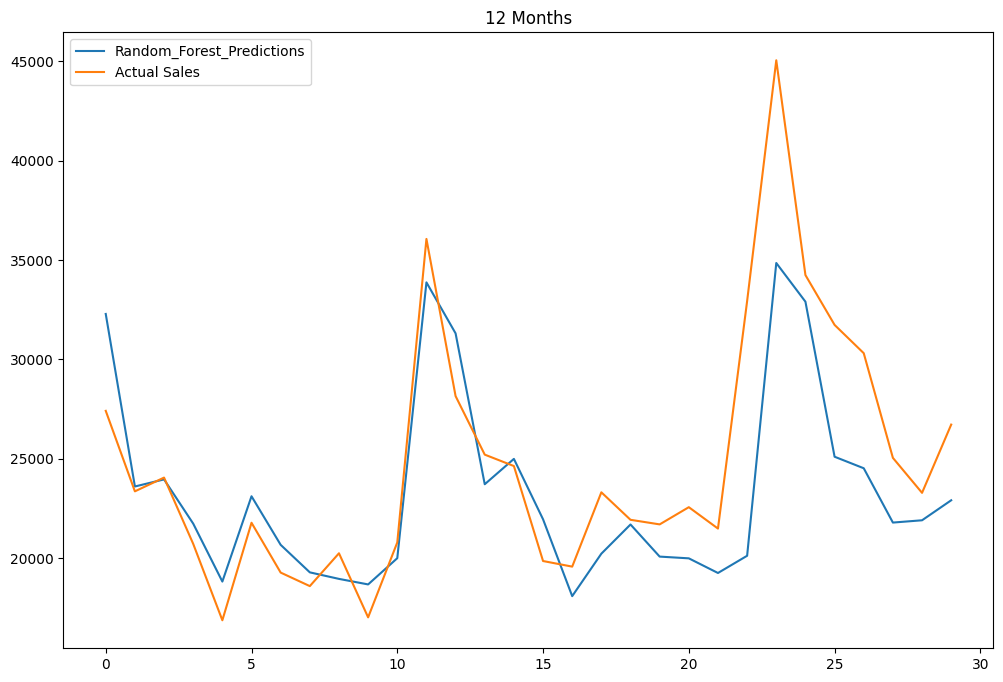

In [75]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.title("12 Months")
plt.show()

In [76]:


from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))

In [77]:

print('Mean Squared Error for Random Forest Model is:',rmse_rf)

Mean Squared Error for Random Forest Model is: 3917.6809950743395


#  Linear Regression

In [78]:


from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
     

In [79]:
lin_model.fit(X_train,y_train)

LinearRegression()

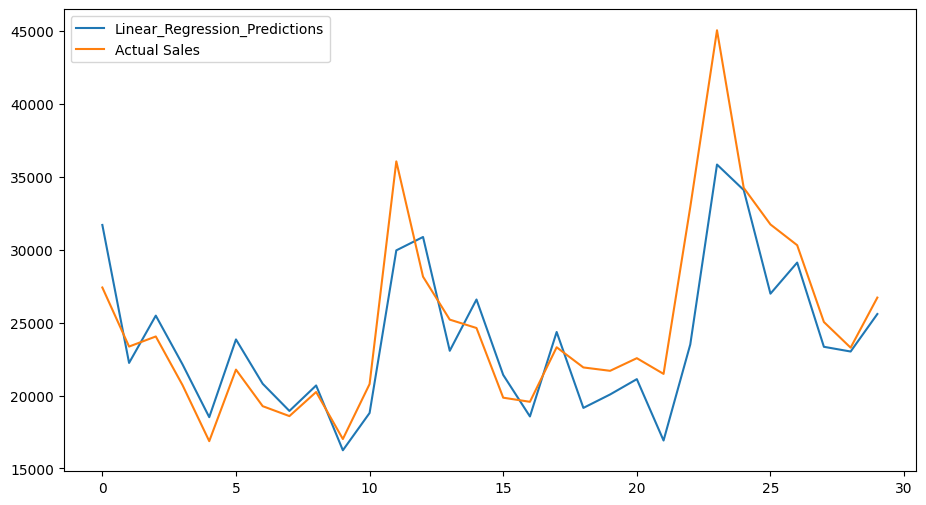

In [80]:

lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [81]:
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Linear Regression Model is: 3321.515929100642
